<a href="https://colab.research.google.com/github/GashonHussein/CNN-DerascopicClassification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, scipy.ndimage
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.losses import binary_crossentropy
import requests
import zipfile
import io, random
import imageio
import numpy as np
import tensorflow as tf
from PIL import Image

tf.compat.v1.disable_eager_execution()

# Seed value for weight initialization
seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Download and extract data.
print('Downloading data. This will take a couple minutes...')
r = requests.get("http://web.stanford.edu/class/cs21si/resources/unit4_resources.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
print('Finished downloading data!')

base_path = 'unit4_resources/addi/'
train_path = base_path + 'train'
val_path = base_path + 'val'
test_path = base_path + 'test'

Finished downloading data!


Showing normal image with index 0


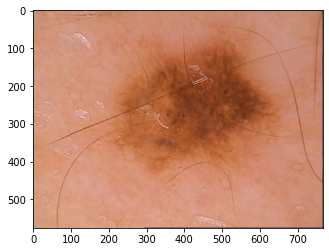

Showing abnormal image with index 0


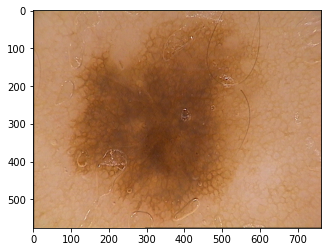

In [ ]:
def show_example(label, index=0):
    img_name = os.listdir('%s/%s' % (train_path, label))[index]
    path = '%s/%s/%s' % (train_path, label, img_name)
    img = plt.imread(path)
    print('Showing %s image with index %d' % (label, index))
    plt.figure()
    plt.imshow(img)
    plt.show()

show_example('normal', index=0)
show_example('abnormal', index=0)

In [ ]:
def load_data(batch_size):
    train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(train_path, 
                                                        target_size=(150, 150),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

    val_generator = test_datagen.flow_from_directory(val_path,
                                                     target_size=(150, 150),
                                                     batch_size=batch_size,
                                                     class_mode='binary')
    
    test_generator = test_datagen.flow_from_directory(test_path,
                                                      target_size=(150, 150),
                                                      batch_size=25,
                                                      class_mode='binary',
                                                      shuffle=False)
    
    return train_generator, val_generator, test_generator

train_generator, val_generator, test_generator = load_data(16)

Found 125 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [ ]:
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

model = get_cnn()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                  

In [ ]:
def train_model(train_generator, validation_generator, epochs=5):

    model = get_cnn()

    model.fit_generator(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator))
    return model
    
model = train_model(train_generator, val_generator, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
7/8 [=========================>....] - ETA: 0s - batch: 3.0000 - size: 15.5714 - loss: 3.4033 - accuracy: 0.6330

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


8/8 [==============================] - 14s 291ms/step - batch: 3.5000 - size: 15.6250 - loss: 3.5932 - accuracy: 0.6080 - val_loss: 0.8073 - val_accuracy: 0.4000
Epoch 2/10
8/8 [==============================] - 4s 521ms/step - batch: 3.5000 - size: 15.6250 - loss: 2.1318 - accuracy: 0.6800 - val_loss: 0.8309 - val_accuracy: 0.4000
Epoch 3/10
8/8 [==============================] - 4s 512ms/step - batch: 3.5000 - size: 15.6250 - loss: 1.3297 - accuracy: 0.6720 - val_loss: 1.1047 - val_accuracy: 0.4000
Epoch 4/10
8/8 [==============================] - 4s 511ms/step - batch: 3.5000 - size: 15.6250 - loss: 0.9916 - accuracy: 0.6640 - val_loss: 1.4036 - val_accuracy: 0.4000
Epoch 5/10
8/8 [==============================] - 4s 519ms/step - batch: 3.5000 - size: 15.6250 - loss: 1.2990 - accuracy: 0.6160 - val_loss: 2.0620 - val_accuracy: 0.4000
Epoch 6/10
8/8 [==============================] - 4s 499ms/step - batch: 3.5000 - size: 15.6250 - loss: 0.8093 - accuracy: 0.7040 - val_loss: 2.1558 -

In [ ]:
model = load_model('unit4_resources/trained_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 72, 72, 32)       

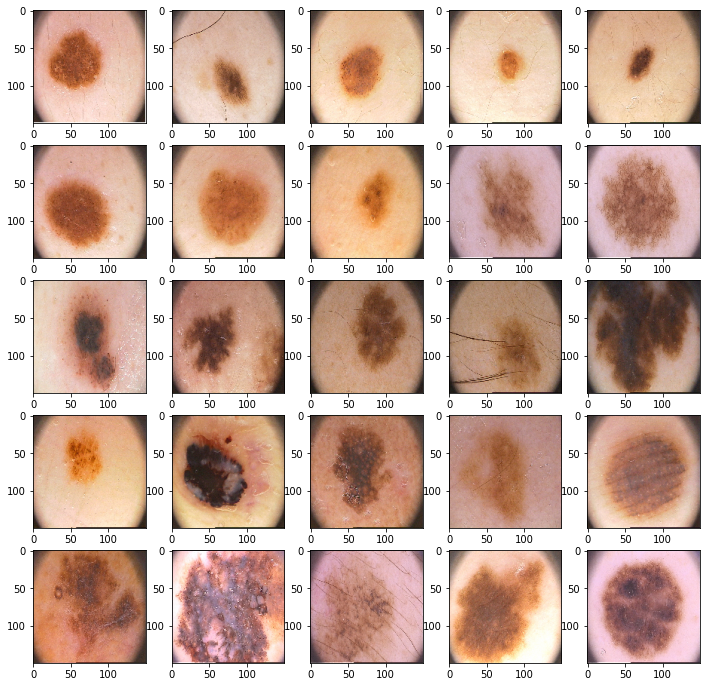

In [ ]:
_, axs = plt.subplots(5, 5, figsize=(12, 12))
axs = axs.flatten()
for imgs, _ in test_generator:
  for img, ax in zip(imgs, axs):
      ax.imshow(img)
  break
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted normal (ground truth is abnormal)


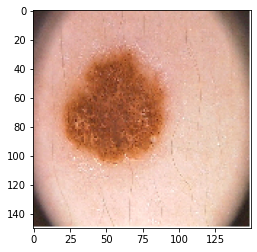

Predicted normal (ground truth is abnormal)


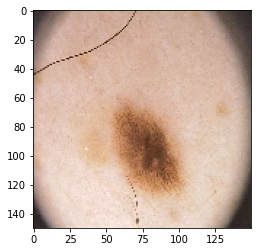

Predicted normal (ground truth is abnormal)


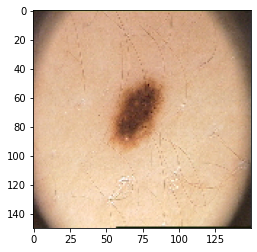

Predicted normal (ground truth is abnormal)


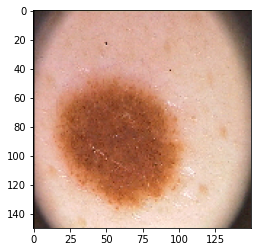

Predicted normal (ground truth is abnormal)


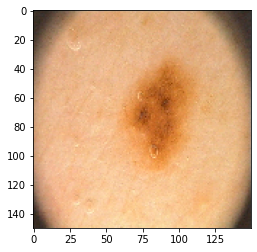

Predicted normal (ground truth is abnormal)


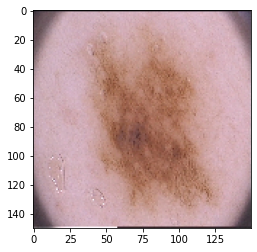

Predicted normal (ground truth is abnormal)


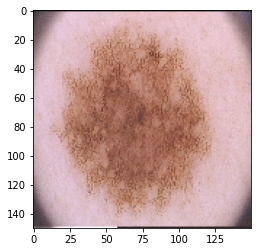

In [ ]:
pred = model.predict_generator(test_generator, len(test_generator))
pred = (pred > 0.5).astype(float)

for imgs, labels in test_generator:
  for i in range(len(labels)):
    if labels[i] != pred[i]:
      plt.figure()
      plt.imshow(imgs[i])
      print("Predicted %s (ground truth is %s)" % ('normal' if pred[i] >= 0.5 else 'abnormal', 'normal' if labels[i] >= 0.5 else 'abnormal'))
      plt.show()

  break

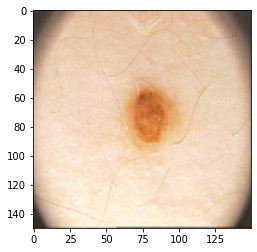

Prediction using this image: abnormal (raw prediction: 0.41)


In [ ]:
abnormal_path = 'unit4_resources/addi/test/abnormal/'
img_path = abnormal_path + os.listdir(abnormal_path)[6]

img = imageio.imread(img_path)
img = np.array(Image.fromarray(img).resize((150, 150)))[np.newaxis, :, :, :].astype(float)/255.0

plt.imshow(np.squeeze(img))
plt.show()

pred = model.predict(img)[0, 0]
print("Prediction using this image: %s (raw prediction: %0.2f)" % ('normal' if pred >= 0.5 else 'abnormal', pred))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


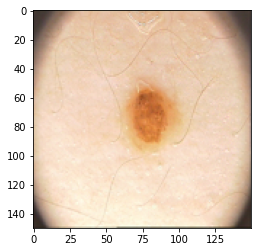

Prediction using this image: normal (raw prediction: 0.97)


In [ ]:
pertubation_amount = 0.2
def add_targetted_noise(fooling_img):
  for _ in range(15):
    # Get the loss value and the gradient of the image with respect to 
    # output probability
    y_true = K.placeholder((1, 1))
    loss = K.mean(binary_crossentropy(y_true, model.output))
    get_grads = K.function([model.input, y_true], K.gradients(loss, model.input))

    # Perturb the image so as to increase the probability
    grad = -get_grads([fooling_img, [[0]]])[0]
    fooling_img = fooling_img - pertubation_amount*grad
    
    # Break once we have a very high probability
    pred = model.predict(fooling_img)[0, 0]
    if pred >= 0.95:
        break
  
  return fooling_img

fooling_img = add_targetted_noise(img.copy())

plt.imshow(np.squeeze(fooling_img))
plt.show()
pred = model.predict(fooling_img)[0, 0]
print("Prediction using this image: %s (raw prediction: %0.2f)" % ('normal' if pred >= 0.5 else 'abnormal', pred))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


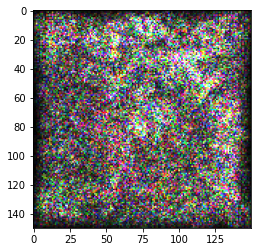

In [ ]:
plt.imshow(np.squeeze(np.abs((fooling_img - img) * 100)))
plt.show()